# 1. Conhecendo os Dados

Dataset para Prever o Valor de um Seguro de Saúde

* Idade

* Sexo Biológico

* IMC - índice de massa corporal

* Fumante

* Children - quantos filhos possuem

* Região que reside

* Valor do Seguro

In [ ]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/regressao_boosting/refs/heads/main/Dados/insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Traduzindo o nome das colunas para melhor entendimento

In [ ]:
traducao = {
    'age': 'idade',
    'sex': 'sexo',
    'bmi': 'imc',
    'children': 'filhos',
    'smoker': 'fumante',
    'region': 'regiao',
    'charges': 'valor_seguro'
}

dados = dados.rename(columns=traducao)
dados.columns

Index(['idade', 'sexo', 'imc', 'filhos', 'fumante', 'regiao', 'valor_seguro'], dtype='object')

# Análises Preliminares

* Verificando os tipos dos dados, quantidade e se possuem dados nulos

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idade         1338 non-null   int64  
 1   sexo          1338 non-null   object 
 2   imc           1338 non-null   float64
 3   filhos        1338 non-null   int64  
 4   fumante       1338 non-null   object 
 5   regiao        1338 non-null   object 
 6   valor_seguro  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Verificando a somatória dos dados nulos por feature

In [ ]:
dados.isnull().sum()

,0
idade,0
sexo,0
imc,0
filhos,0
fumante,0
regiao,0
valor_seguro,0


* Verificando se existem dados duplicados no dataset

In [ ]:
dados.duplicated().sum()

np.int64(1)

In [ ]:
dados.drop_duplicates(inplace=True)
dados.duplicated().sum()

np.int64(0)

* Verificando as análises dos dados numéricos do dataset

In [ ]:
dados.describe().round(3)

,idade,imc,filhos,valor_seguro
count,1337.000,1337.000,1337.000,1337.000
mean,39.222,30.663,1.096,13279.121
std,14.044,6.100,1.206,12110.360
min,18.000,15.960,0.000,1121.874
25%,27.000,26.290,0.000,4746.344
50%,39.000,30.400,1.000,9386.161
75%,51.000,34.700,2.000,16657.717
max,64.000,53.130,5.000,63770.428


# Fazendo o Pré-Processamento antes das montagens dos gráficos

In [ ]:
dados.head()

,idade,sexo,imc,filhos,fumante,regiao,valor_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Verificando os dados únicos das features que iremos tratar

In [ ]:
dados['sexo'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dados['fumante'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dados['regiao'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

* Trando os dados de Sexo e Fumante - deixando tudo em uma coluna binária 0 e 1

In [ ]:
sexo = {
    'female': 0,
    'male': 1
}
dados['sexo'] = dados['sexo'].map(sexo)

In [ ]:
fumante = {
    'yes' : 1,
    'no' : 0
}
dados['fumante'] = dados['fumante'].map(fumante)

* Fazendo o One Hot Encoder para o Pré-Processamento dos Dados - coluna da Região

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

dados_encoded = encoder.fit_transform(dados[['regiao']])

In [ ]:
df_encoded = pd.DataFrame(dados_encoded, columns=encoder.get_feature_names_out())
df_encoded.head()

,regiao_northwest,regiao_southeast,regiao_southwest
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
dados = dados.reset_index(drop=True)

df_encoded = df_encoded.reset_index(drop=True)

In [ ]:
dados = dados.drop('regiao', axis=1)

In [ ]:
df = pd.concat([dados, df_encoded], axis=1)
df.head()

,idade,sexo,imc,filhos,fumante,valor_seguro,regiao_northwest,regiao_southeast,regiao_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,1.0,0.0,0.0


# 2. Análises Gráficas

# Comportamento da Variável Dependente (Y)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Accent')
sns.set_theme(style='darkgrid')

* Verificando com o BOXPLOT se os valores do Seguro estão bem distribuídos e se apresentam Outliers

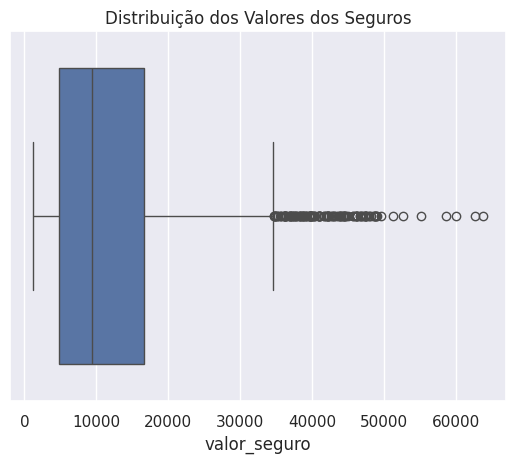

In [ ]:
sns.boxplot(data=df, x='valor_seguro')
plt.title('Distribuição dos Valores dos Seguros')
plt.show()

* Verificando agora a DISTRIBUIÇÃO dos dados, e notamos que precisa ser feita transformação logarítmica para ajustar os valores

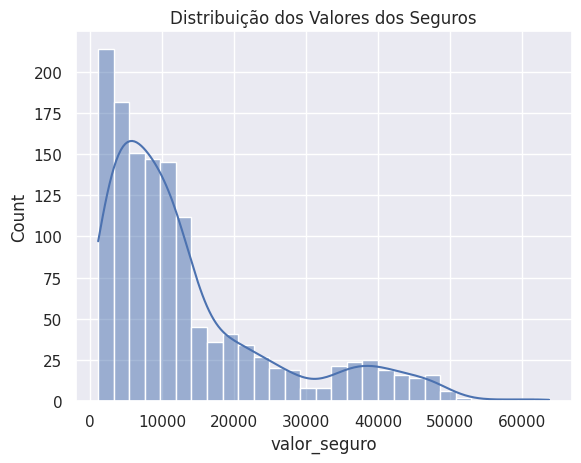

In [ ]:
sns.histplot(data=df, x='valor_seguro', kde=True)
plt.title('Distribuição dos Valores dos Seguros')
plt.show()

# Dispersão entre as Variáveis

In [ ]:
df.columns

Index(['idade', 'sexo', 'imc', 'filhos', 'fumante', 'valor_seguro',
       'regiao_northwest', 'regiao_southeast', 'regiao_southwest'],
      dtype='object')

In [ ]:
colunas = dados.drop('valor_seguro', axis=1)

* Verificando a Dispersão das Variáveis em Relação a Valor do Seguro

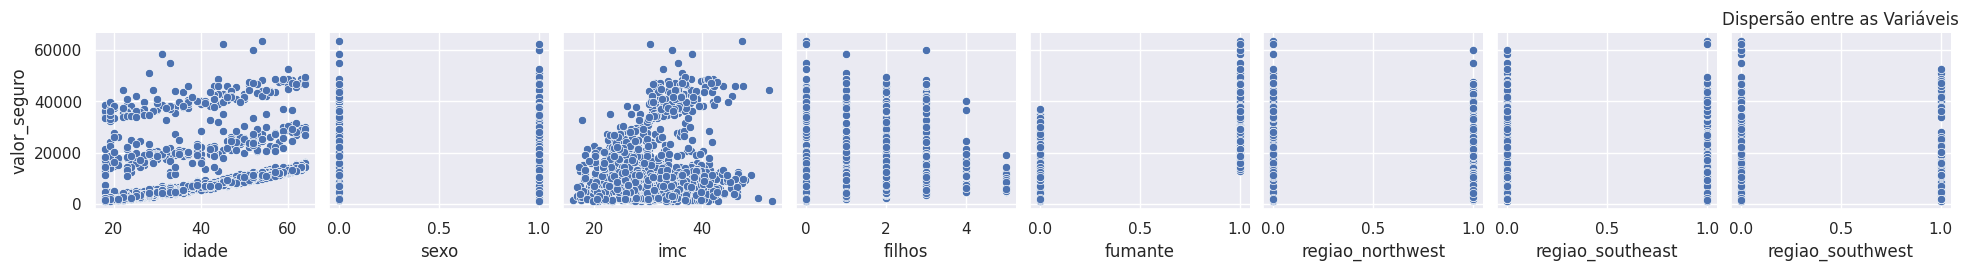

In [ ]:
sns.pairplot(data=df, y_vars='valor_seguro', x_vars=['idade', 'sexo', 'imc', 'filhos', 'fumante','regiao_northwest', 'regiao_southeast', 'regiao_southwest'])
plt.title('Dispersão entre as Variáveis')
plt.show()

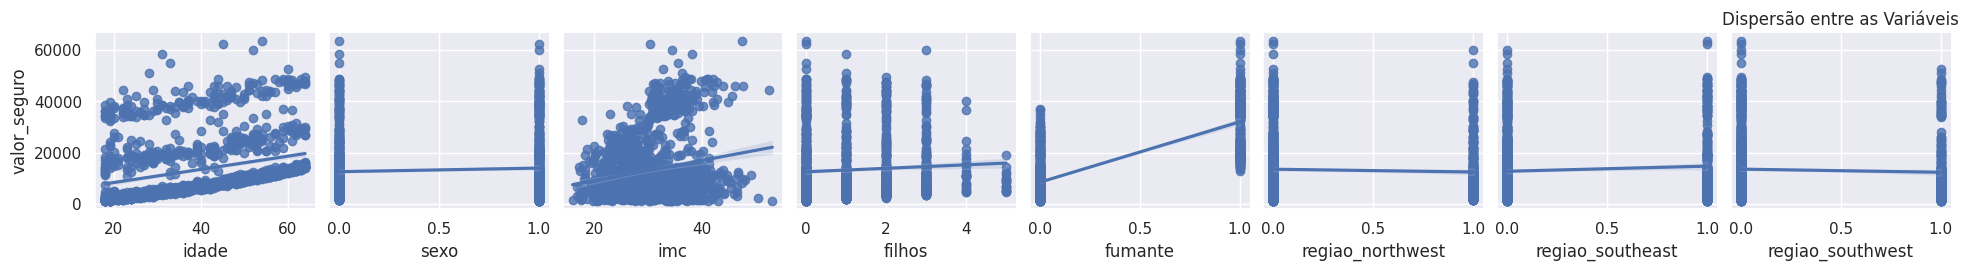

In [ ]:
sns.pairplot(data=df, y_vars='valor_seguro', x_vars=['idade', 'sexo', 'imc', 'filhos', 'fumante','regiao_northwest', 'regiao_southeast', 'regiao_southwest'], kind='reg')
plt.title('Dispersão entre as Variáveis')
plt.show()

# Correlação entre os Dados

In [ ]:
df.corr().round(3)

,idade,sexo,imc,filhos,fumante,valor_seguro,regiao_northwest,regiao_southeast,regiao_southwest
idade,1.000,-0.020,0.109,0.042,-0.026,0.298,0.001,-0.012,0.009
sexo,-0.020,1.000,0.046,0.018,0.077,0.058,-0.012,0.018,-0.004
imc,0.109,0.046,1.000,0.013,0.004,0.198,-0.136,0.270,-0.006
filhos,0.042,0.018,0.013,1.000,0.007,0.067,0.026,-0.023,0.022
fumante,-0.026,0.077,0.004,0.007,1.000,0.787,-0.036,0.068,-0.037
valor_seguro,0.298,0.058,0.198,0.067,0.787,1.000,-0.039,0.074,-0.044
regiao_northwest,0.001,-0.012,-0.136,0.026,-0.036,-0.039,1.000,-0.346,-0.320
regiao_southeast,-0.012,0.018,0.270,-0.023,0.068,0.074,-0.346,1.000,-0.347
regiao_southwest,0.009,-0.004,-0.006,0.022,-0.037,-0.044,-0.320,-0.347,1.000


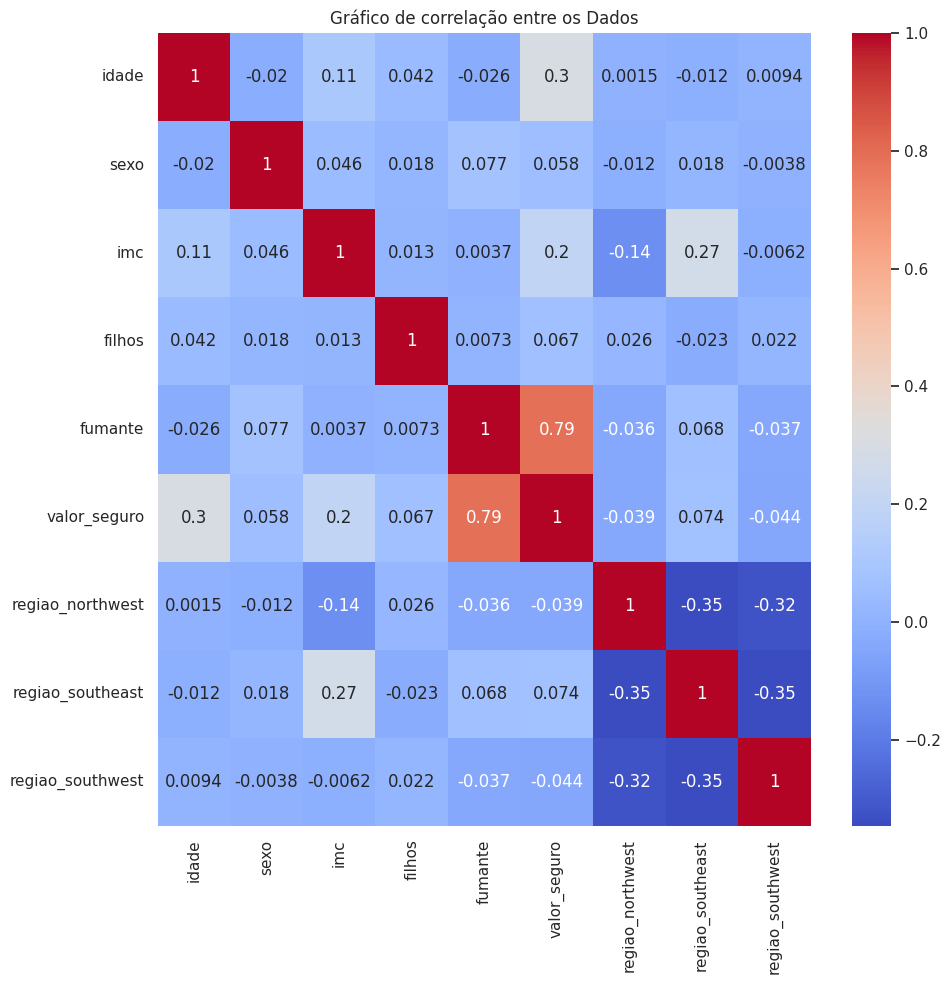

In [ ]:
ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Gráfico de correlação entre os Dados')
plt.tight_layout()
plt.show()

# 3. Transformação de Variáveis

# Transformando os dados em LOG

In [ ]:
import numpy as np

In [ ]:
df.describe().round(3)

,idade,sexo,imc,filhos,fumante,valor_seguro,regiao_northwest,regiao_southeast,regiao_southwest
count,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000
mean,39.222,0.505,30.663,1.096,0.205,13279.121,0.242,0.272,0.243
std,14.044,0.500,6.100,1.206,0.404,12110.360,0.429,0.445,0.429
min,18.000,0.000,15.960,0.000,0.000,1121.874,0.000,0.000,0.000
25%,27.000,0.000,26.290,0.000,0.000,4746.344,0.000,0.000,0.000
50%,39.000,1.000,30.400,1.000,0.000,9386.161,0.000,0.000,0.000
75%,51.000,1.000,34.700,2.000,0.000,16657.717,0.000,1.000,0.000
max,64.000,1.000,53.130,5.000,1.000,63770.428,1.000,1.000,1.000


* Fazendo a Transformação Logaritmica - apenas dos dados numéricos sem ser binários

In [ ]:
df['log_idade'] = np.log(df['idade'])
df['log_imc'] = np.log(df['imc'])
df['log_valor_seguro'] = np.log(df['valor_seguro'])

# Distribuição da Variável Dependente Transformada (Y)

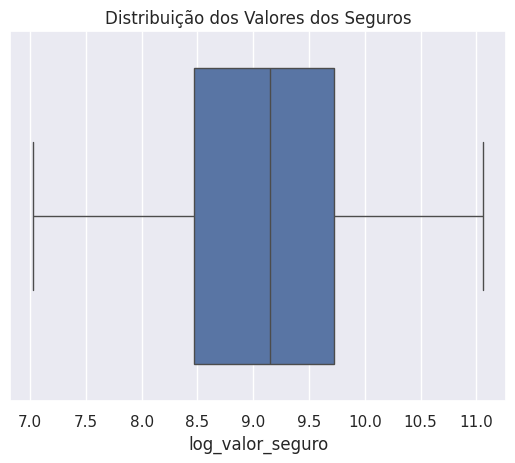

In [ ]:
sns.boxplot(df, x='log_valor_seguro')
plt.title('Distribuição dos Valores dos Seguros')
plt.show()

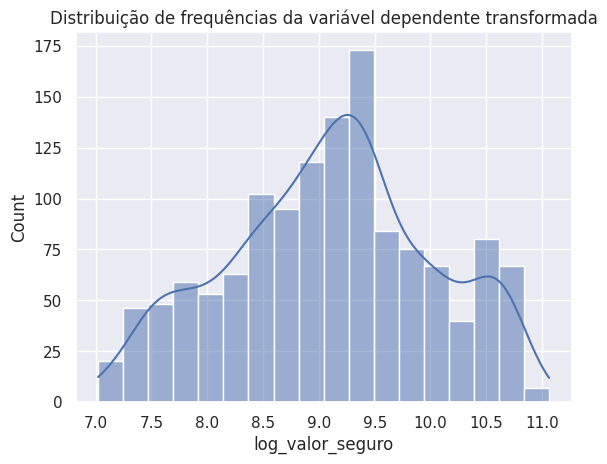

In [ ]:
sns.histplot(df, x='log_valor_seguro', kde=True)
plt.title('Distribuição de frequências da variável dependente transformada')
plt.show()

# Verificando as variáveis dependente depois de transformada

In [ ]:
df.columns

Index(['idade', 'sexo', 'imc', 'filhos', 'fumante', 'valor_seguro',
       'regiao_northwest', 'regiao_southeast', 'regiao_southwest', 'log_idade',
       'log_imc', 'log_valor_seguro'],
      dtype='object')

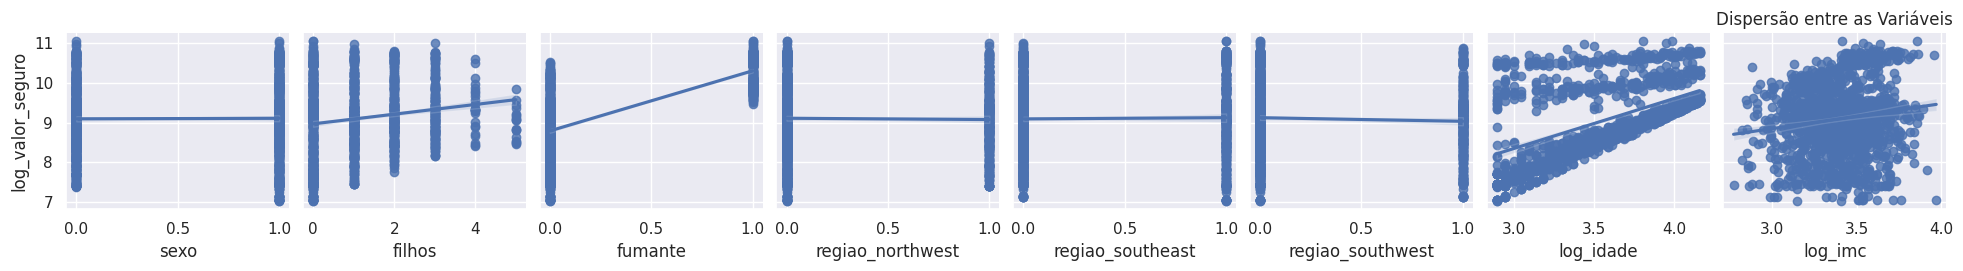

In [ ]:
sns.pairplot(df, y_vars='log_valor_seguro', x_vars=['sexo','filhos', 'fumante','regiao_northwest', 'regiao_southeast', 'regiao_southwest', 'log_idade','log_imc'], kind='reg')
plt.title('Dispersão entre as Variáveis')
plt.show()

# 4. Regressão Linear

# Regressão Linear com StatsModels

In [ ]:
from sklearn.model_selection import train_test_split

* Separando em X e Y

In [ ]:
X = df[['sexo','filhos', 'fumante','regiao_northwest', 'regiao_southeast', 'regiao_southwest', 'log_idade','log_imc']]

y = df['log_valor_seguro']

* Separação em Treino 80% e Teste 20%

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

* Adicionando a constante para fazer o treinamento com StatsModels

In [ ]:
import statsmodels.api as sm

In [ ]:
x_treino_com_constante = sm.add_constant(x_treino)

In [ ]:
x_treino_com_constante.head()

,const,sexo,filhos,fumante,regiao_northwest,regiao_southeast,regiao_southwest,log_idade,log_imc
1113,1.0,1,0,0,0.0,0.0,0.0,3.135494,3.199081
967,1.0,1,2,0,0.0,0.0,0.0,3.044522,3.248240
598,1.0,0,2,0,1.0,0.0,0.0,3.951244,3.625007
170,1.0,1,0,0,0.0,1.0,0.0,4.143135,3.724970
275,1.0,0,2,0,0.0,0.0,0.0,3.850148,3.280911


In [ ]:
modelo_stats = sm.OLS(y_treino, x_treino_com_constante).fit()

In [ ]:
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:       log_valor_seguro   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     396.1
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          3.54e-312
Time:                        10:58:42   Log-Likelihood:                -672.38
No. Observations:                1069   AIC:                             1363.
Df Residuals:                    1060   BIC:                             1408.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9201      0.262  

* **Observando o teste de significância individual, notamos que regiao_northwest não ajuda o modelo, portanto teremos que excluir ele**

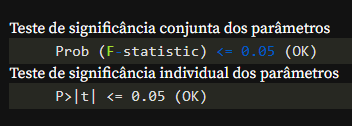

In [ ]:
X = df[['sexo','filhos', 'fumante','log_idade','log_imc']]

y = df['log_valor_seguro']

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

x_treino_com_constante = sm.add_constant(x_treino)

modelo_stats_models = sm.OLS(y_treino, x_treino_com_constante).fit()

print(modelo_stats_models.summary())

                            OLS Regression Results                            
Dep. Variable:       log_valor_seguro   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     625.3
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          1.61e-313
Time:                        10:58:42   Log-Likelihood:                -678.89
No. Observations:                1069   AIC:                             1370.
Df Residuals:                    1063   BIC:                             1400.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0463      0.259     11.784      0.0

# 5. Modelos de Machine Learning

# Regressão Linear com Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo_lr = LinearRegression()
modelo_lr.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
print('Métricas conjunto treino:')
print(f'R²: {metrics.r2_score(y_treino, modelo_lr.predict(x_treino))}')
print(f'MAE: {metrics.mean_absolute_error(y_treino, modelo_lr.predict(x_treino))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_treino, modelo_lr.predict(x_treino)))}')

print('\nMétricas conjunto teste:')
print(f'R²: {metrics.r2_score(y_teste, modelo_lr.predict(x_teste))}')
print(f'MAE: {metrics.mean_absolute_error(y_teste, modelo_lr.predict(x_teste))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_teste, modelo_lr.predict(x_teste)))}')

Métricas conjunto treino:
R²: 0.7462616730125574
MAE: 0.29812137673091976
RMSE: 0.546004923724063

Métricas conjunto teste:
R²: 0.8270642015940886
MAE: 0.27163781918402125
RMSE: 0.5211888517457192


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo_rf = RandomForestRegressor()
modelo_rf.fit(x_treino, y_treino)

RandomForestRegressor()

In [ ]:
print('Métricas conjunto treino:')
print(f'R²: {metrics.r2_score(y_treino, modelo_rf.predict(x_treino))}')
print(f'MAE: {metrics.mean_absolute_error(y_treino, modelo_rf.predict(x_treino))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_treino, modelo_rf.predict(x_treino)))}')

print('\nMétricas conjunto teste:')
print(f'R²: {metrics.r2_score(y_teste, modelo_rf.predict(x_teste))}')
print(f'MAE: {metrics.mean_absolute_error(y_teste, modelo_rf.predict(x_teste))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_teste, modelo_rf.predict(x_teste)))}')

Métricas conjunto treino:
R²: 0.9696111694664984
MAE: 0.08265596896670725
RMSE: 0.28749951124603196

Métricas conjunto teste:
R²: 0.8181754782757702
MAE: 0.22460364622655393
RMSE: 0.47392367130852825


# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
modelo_xgb = xgb.XGBRegressor(objective='reg:squarederror')
modelo_xgb.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print('Métricas conjunto treino:')
print(f'R²: {metrics.r2_score(y_treino, modelo_xgb.predict(x_treino))}')
print(f'MAE: {metrics.mean_absolute_error(y_treino, modelo_xgb.predict(x_treino))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_treino, modelo_xgb.predict(x_treino)))}')

print('\nMétricas conjunto teste:')
print(f'R²: {metrics.r2_score(y_teste, modelo_xgb.predict(x_teste))}')
print(f'MAE: {metrics.mean_absolute_error(y_teste, modelo_xgb.predict(x_teste))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_teste, modelo_xgb.predict(x_teste)))}')

Métricas conjunto treino:
R²: 0.9935027957512081
MAE: 0.04433878457983928
RMSE: 0.21056776719108572

Métricas conjunto teste:
R²: 0.7486272765006309
MAE: 0.2653351006904892
RMSE: 0.5151068827830678


# 6. Ajustando Hiperparâmetros do XGBoost

* Aplicando o GridSearch em busca dos melhores hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    "max_depth": [3, 5, 7,10],
    #"subsample": [0.6, 0.8, 1],
    #"colsample_bytree": [0.6, 0.8, 1],
    "gamma": [0, 0.1, 0.5, 1, 5],
   "reg_alpha": [0, 0.01, 0.1, 1, 10],
    "reg_lambda": [0.1, 1, 5, 10, 20],
    "min_child_weight": [1, 2, 5],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
}

modelo_xgb = xgb.XGBRegressor()

grid = GridSearchCV(
    estimator=modelo_xgb,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose=1
)

grid.fit(X, y)

print(f'Melhores parametros : {grid.best_params_}')
print(f'Melhor Score : {np.sqrt(np.abs(grid.best_score_))}')

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits
Melhores parametros : {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'reg_alpha': 1, 'reg_lambda': 1}
Melhor Score : 0.37330583982638293


* Fazendo a Validação do modelo com a API do Scikit-Learn

In [ ]:
dtreino = xgb.DMatrix(x_treino, y_treino)
dteste = xgb.DMatrix(x_teste, y_teste)

params = {'objective' : 'reg:squarederror', 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'reg_alpha': 1, 'reg_lambda': 5}

eval_results = {}

modelo = xgb.train(
    params = params,
    dtrain= dtreino,
    num_boost_round= 1000,
    evals= [(dtreino, 'treino'), (dteste, 'teste')],
    evals_result= eval_results,
    early_stopping_rounds=50,
    verbose_eval= 10
)

treino_rmse = eval_results['treino']['rmse']
teste_rmse = eval_results['teste']['rmse']

[0]	treino-rmse:0.77391	teste-rmse:0.81476
[10]	treino-rmse:0.38690	teste-rmse:0.35992
[20]	treino-rmse:0.36374	teste-rmse:0.33551
[30]	treino-rmse:0.35714	teste-rmse:0.33638
[40]	treino-rmse:0.35714	teste-rmse:0.33638
[50]	treino-rmse:0.35714	teste-rmse:0.33638
[60]	treino-rmse:0.35714	teste-rmse:0.33638
[70]	treino-rmse:0.35714	teste-rmse:0.33638
[74]	treino-rmse:0.35714	teste-rmse:0.33638


* Plotando um gráfico dos dados de Treino e Teste de RMSE

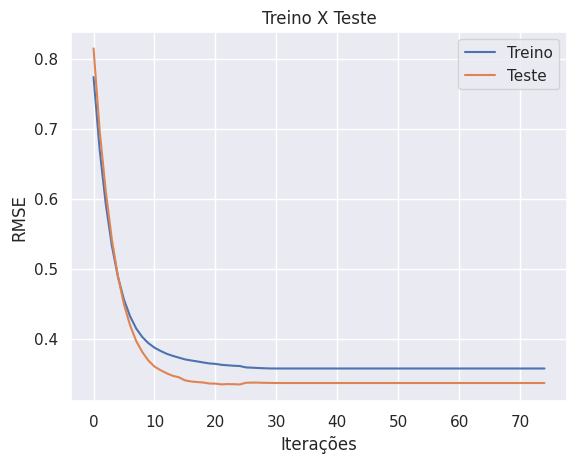

In [ ]:
plt.plot(treino_rmse, label='Treino')
plt.plot(teste_rmse, label='Teste')
plt.title('Treino X Teste')
plt.xlabel('Iterações')
plt.ylabel('RMSE')
plt.legend()

# Gráfico Real X Previsto

In [ ]:
y_teste_previsto = modelo.predict(dteste)

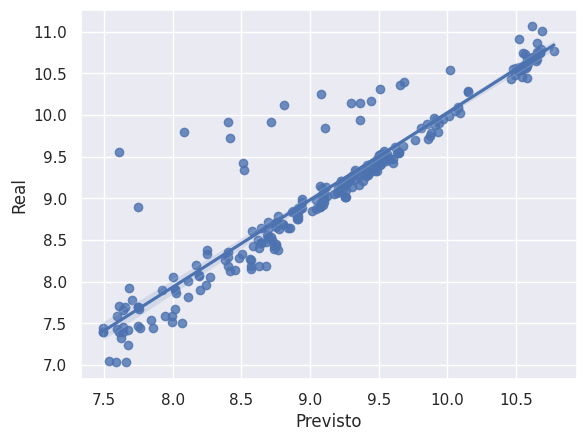

In [ ]:
sns.regplot(x=y_teste_previsto, y = y_teste)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

* Forte correlação linear entre valores reais e previstos

* Pontos concentrados próximos à linha identidade (y = x)

* Baixa dispersão, indicando erro médio reduzido

* Ausência de viés visual significativo nas previsões

* Boa capacidade de generalização no conjunto de teste

# Gráfico Resíduos

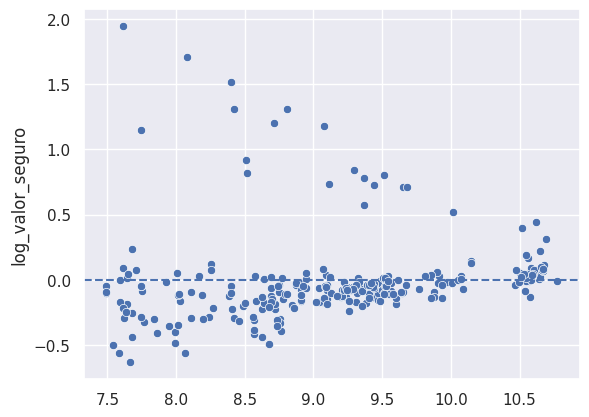

In [ ]:
residuo = y_teste - y_teste_previsto

sns.scatterplot(x=y_teste_previsto, y=residuo)
plt.axhline(0, linestyle="--")
plt.show()

* Erros centrados próximos de zero

* Modelo aparentemente não enviesado

* Poucos pontos com erro elevado

# Salvando o Modelo

In [ ]:
import joblib

modelo = joblib.dump(modelo, 'modelo.pkl')